# Série Temporal Maare
	

**Dados_brutos_Maare_2016_HDM.xlsx** :: Parece ser a série completa porém faltando as abas de meteorologia.

**MAArE_HDMdados_201508.xlsx** :: Parece ser a mesma série, truncada em um gap em 2015, com as abas de meteorologia.

**MAArE_HDMdados_201607_AdpRadMet.xlsx** :: Perece ser o mesmo que o Dados_brutos_Maare_2016_HDM.xlsx mas com uma aba _Meteo_SaoJose_ no lugar da _Meteo_Aeroporto_, a meteorologia não bate as datas! 

Abas:

- [X] Corrente :: Dados_brutos_Maare_2016_HDM.xlsx
- [X] Nivel_Temp :: Dados_brutos_Maare_2016_HDM.xlsx
- [X] Ondas :: Dados_brutos_Maare_2016_HDM.xlsx
- [X] Nivel_Capitania :: Dados_brutos_Maare_2016_HDM.xlsx
- [ ] Meteo_Peri
- [ ] Meteo_Aeroporto
- [ ] Meteo_SaoJose

In [1]:
import pandas as pd


def read_sheet(fname, sheet_name):
    df = pd.read_excel(
        fname,
        sheet_name=sheet_name,
        skiprows=20,
        na_values=-999.0,
    ).dropna(axis=1, how="all")
    index = pd.to_datetime(
        {
            "year": df["Ano"],
            "month": df["Mes"],
            "day": df["Dia"],
            "hour": df["Hora"],
        },
    )
    df.index = index
    return df.drop(["Ano", "Mes", "Dia", "Hora"], axis=1)

## ADCP

- Estação Amostral:	ADP - P14
- Latitude:	-27.253183
- Longitude:	-48.401215
- Datum:	SIRGAS-2000
- Declinação Magnética	corrigida


- Intervalo de Amostragem:	60 minutos
- Tempo de Amostragem:	5 minutos
- Taxa de Aquisição Interna:	1000 kHz


- Início da Série Temporal:	3/30/2014 12:00
- Término da Série Temporal:	7/2/2015 10:00
- Total [dias]	458.92


- Equipamento	ADP - Sontek
- Marca	Sontek
- Nº de Série	M1327

In [2]:
adcp = read_sheet("Dados_brutos_Maare_2016_HDM.xlsx", sheet_name="Corrente")
hght = read_sheet("Dados_brutos_Maare_2016_HDM.xlsx", sheet_name="Nivel_Temp")
wave = read_sheet("Dados_brutos_Maare_2016_HDM.xlsx", sheet_name="Ondas")

df = pd.concat([adcp, hght, wave], axis=1)
df.columns

Index(['U01(m/s)', 'V01(m/s)', 'U02(m/s)', 'V02(m/s)', 'U03(m/s)', 'V03(m/s)',
       'U04m/s)', 'V04(m/s)', 'U05(m/s)', 'V05(m/s)', 'U06m/s)', 'V06(m/s)',
       'U07(m/s)', 'V07(m/s)', 'U08m/s)', 'V08(m/s)', 'U09(m/s)', 'V09(m/s)',
       'U10m/s)', 'V10(m/s)', 'U11(m/s)', 'V11(m/s)', 'U12m/s)', 'V12(m/s)',
       'U13(m/s)', 'V13(m/s)', 'U14m/s)', 'V14(m/s)', 'U15(m/s)', 'V15(m/s)',
       'U16m/s)', 'V16(m/s)', 'AltColAgua(m)', 'Temperatura(graus)', 'Hm0(m)',
       'DirTp(graus)', 'SprTp(graus)', 'Tp(s)'],
      dtype='object')

## Height

- Capitania: -48.567624, -27.595909

A __Dados_brutos_Maare_2016_HDM.xlsx__ contém toda a série mas parece ter um offset de ~0.023 em relação a planilha __MAArE_HDMdados_201508.xlsx__.

In [3]:
level = read_sheet("Dados_brutos_Maare_2016_HDM.xlsx", sheet_name="Nivel_Capitania")

level

,VarNivelAgua(m)
2014-03-06 15:00:00,-0.120044
2014-03-06 16:00:00,-0.106248
2014-03-06 17:00:00,0.023671
2014-03-06 18:00:00,0.205399
2014-03-06 19:00:00,0.218173
...,...
2016-08-12 07:00:00,-0.198784
2016-08-12 08:00:00,-0.001366
2016-08-12 09:00:00,0.046683
2016-08-12 10:00:00,-0.045028


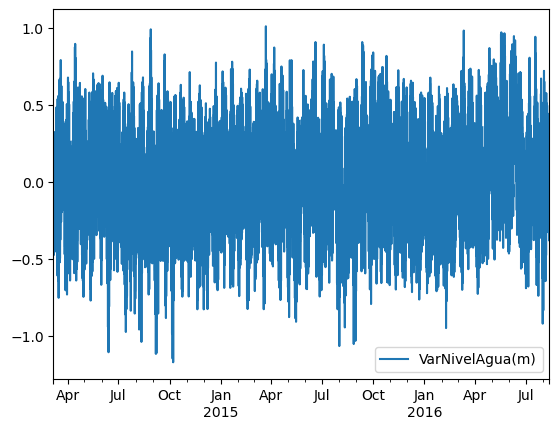

In [4]:
level.plot();